In [1]:
import n2

[09:39:57,266] INFO: python 3.6.5
[09:39:57,267] INFO: n2-tools 0.0.15


In [9]:
%matplotlib inline
import matplotlib.pyplot
import numpy

In [3]:
from astropy.units import deg
from astropy.units import arcmin
from astropy.units import km
from astropy.units import s

In [4]:
# using FUGIN data
# see https://nro-fugin.github.io/
#  ! caution !  file size is too large 1.24 GB
d = n2.open_fits('http://jvo.nao.ac.jp/skynode/do/download/nobeyama/fugin/fugin_meta/FGN00000036')

[09:39:59,570] INFO: (open_fits) path=http://jvo.nao.ac.jp/skynode/do/download/nobeyama/fugin/fugin_meta/FGN00000036, hdu_num=0


In [5]:
d2 = d.cut_world(x=(15.4*deg, 14.8*deg), y=(-0.9*deg, -0.4*deg), z=(0*km/s, 30*km/s))

[09:40:00,404] INFO: (cut_world) x=(<Quantity 15.4 deg>, <Quantity 14.8 deg>), y=(<Quantity -0.9 deg>, <Quantity -0.4 deg>), z=(<Quantity 0. km / s>, <Quantity 30. km / s>)
[09:40:00,405] DEBUG: (cut_world) original shape : (462, 848, 848)
[09:40:00,406] INFO: (cut_world) start calculation
[09:40:02,363] DEBUG: (cut_world_xy) pix range : x=[254, 508], y=[42, 254]
[09:40:02,370] DEBUG: (cut_world_z) pix range : z=[153, 199]
[09:40:02,373] INFO: (cut_world) done
[09:40:02,374] DEBUG: (cut_world) result shape : (46, 212, 254)
[09:40:02,977] DEBUG: (cache.make_cache_dir)
[09:40:02,977] INFO: (cache.save) .n2cache/b6ceaf4bb0a79c583fd4101032067838faca9c14


In [6]:
d3 = d2.velocity_binning_pix(3)

[09:40:11,764] INFO: (velocity_binning_pix) width=3
[09:40:11,765] INFO: (velocity_binning_pix) start calculation
[09:40:11,857] INFO: (velocity_binning_pix) done
[09:40:11,887] INFO: (cache.save) .n2cache/52aaef26596df705621f6a49140be446c225f613


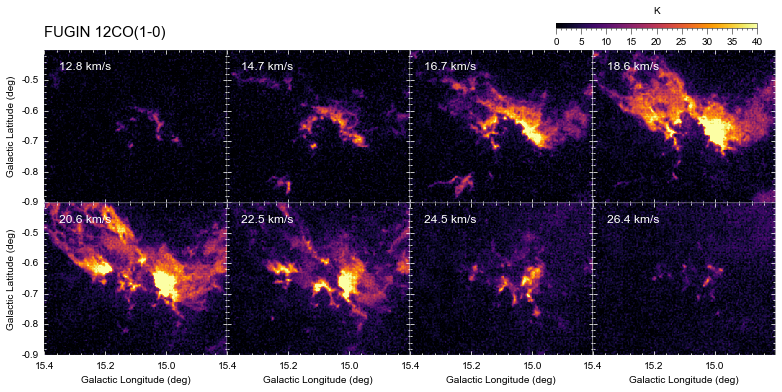

In [49]:
start = 20
step = 3

cube = d3.data[start::step]
v = d3.get_vaxis()[start::step]

nx = d3.header['NAXIS1']
ny = d3.header['NAXIS2']
ncols = 4
nrows = 2

vmin = 0
vmax =40

fig, ax = n2.plot.subplots(nx, ny, ncols, nrows, projection=d3.wcs2)
im = [_a.imshow(_d, vmin=vmin, vmax=vmax) for _a, _d in zip(ax, cube)]
[_a.coords[0].set_axislabel('Galactic Longitude (deg)') for _a in ax]
[_a.coords[0].set_major_formatter('d.d') for _a in ax]
[_a.coords[0].set_ticks(spacing=0.2*deg, color='w', size=4, width=0.5) for _a in ax]
[_a.coords[0].display_minor_ticks(True) for _a in ax]
[_a.coords[0].set_ticklabel_visible(False) for i, _a in enumerate(ax) if i/ncols<1]
[_a.coords[1].set_axislabel('Galactic Latitude (deg)') for _a in ax]
[_a.coords[1].set_major_formatter('d.d') for _a in ax for _a in ax]
[_a.coords[1].set_ticks(spacing=0.1*deg, color='w', size=4, width=0.5) for _a in ax]
[_a.coords[1].display_minor_ticks(True) for _a in ax]
[_a.coords[1].set_ticklabel_visible(False) for i, _a in enumerate(ax) if i%ncols!=0]
[_a.text(0.08, 0.92, '%.1f km/s'%(_v.to('km/s').value), color='w', size=12, ha='left', va='top', transform=_a.transAxes) for _a, _v in zip(ax, v)]
[_a.coords.frame.set_color('w') for _a in ax]
[_a.coords.frame.set_linewidth(0.1) for _a in ax]
cax = n2.plot.colorbar(ax[3], im[3], 'horizontal', space=0.01, start=-0.2, stop=0.9, width=5)
cax.ax.minorticks_on()
cax.set_ticks(numpy.arange(0, 100, 5))
cax.set_label('K', labelpad=-40, color='k')
cax.ax.tick_params(which='both', colors='k', direction='out', width=0.5)
cax.ax.tick_params(which='major', size=6)
cax.ax.tick_params(which='minior', size=3)
cax.outline.set_edgecolor('k')
cax.outline.set_linewidth(0.5)
ax[0].text(0, 1.11, 'FUGIN 12CO(1-0)', size=15, ha='left', va='center', transform=ax[0].transAxes, clip_on=False)
fig.savefig('chmap1.jpg', dpi=40)